# Tehran housing price data analysis  
I will present an analysis about renting a house price in this notebook. Housing data is generated from [Tehran Divar](https://divar.ir/s/tehran/) website and the dataset contains data about renting house in Theran at the end of 1399. I use different types of regression for evaluating model and comparing the results of those types. 

This dataset is available in [kaggle](https://www.kaggle.com/amiralimadadi/tehran-housing) and you can also check the scrap project for generating this dataset [here](https://github.com/amiralimadadi/Divar_WebScrap).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!pip install Unidecode
from unidecode import unidecode

!pip install arabic-reshaper
!pip install python-bidi
from bidi.algorithm import get_display
from arabic_reshaper import reshape

## Why Tehran housing price
There are some major reasons for me to do this research:
1.   **Population**: Tehran is the capital and major city in Iran. It also hosts more than 9 million population in 2021, which makes it the second populated city in the middle east. 
2.   **Housing transactions**: More than 83,000 housing transactions are being made per year in Tehran.
3.   **Housing price**: Housing price has rappidly grown during the last decade in Tehran (notice the graph bellow).
3.   **Districts**: Tehran consists of 22 districts and many neighbourhoods, so finding a good and cheap place to live seems difficault.

As I said, prices are growing up sharply (for both rent and buy a house), there are too many transactions, there are many neighbourhoods in Tehran and many people are requesting to buy or rent a house per month. Therefore, studying this field and making a comprehensive dataset seems necessary for both landloards and tenants.

I selected [Tehran Divar](https://divar.ir/s/tehran/) website as my reference, because it is the greatest website for second hand stuffs deal in Tehran. More than 90 percentages of all housing advertisements are provided in [Tehran Divar](https://divar.ir/s/tehran/).

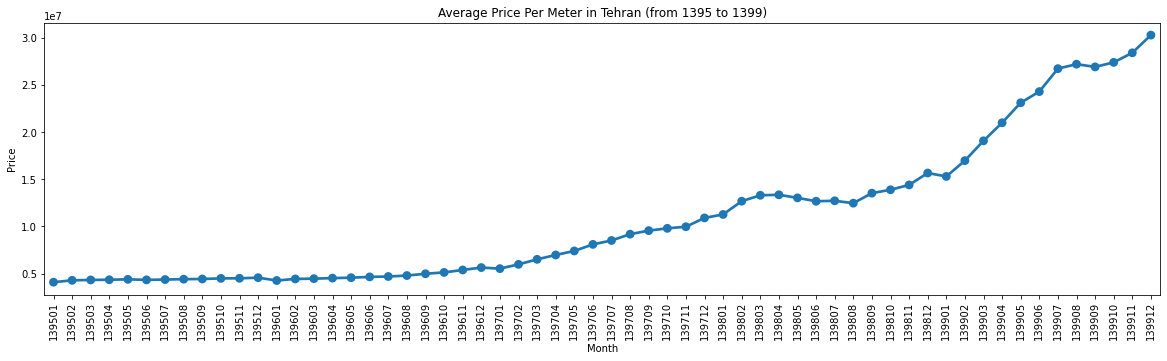

In [2]:
df_bachground = pd.read_csv('TehranHousingPriceBackground.csv', encoding="utf-8")  

plt.figure(figsize= (20, 5))
sns.pointplot(data=df_bachground, x="Month", y="Price")
plt.ylabel(get_display(reshape('Price')))
plt.xlabel(get_display(reshape('Month')))
plt.title('Average Price Per Meter in Tehran (from 1395 to 1399)')
plt.xticks(rotation = "vertical")
plt.show()

## Reading Data
Data stored in csv file has **12,383** records containing **9** features. Features are:
1.   **total_value**: is the overall value of the house. It is calculated based on deposit and monthly rent.
2.   **neighborhood**: is filled based on the house position in Tehran.
3.   **area**: is the area of house in squared meter.
4.   **year**: is the year that the house is built.
5.   **deposit**: is the deposit of house in Iran currency (Tooman).
6.   **rent**: is the monthly rent of house in Iran currency (Tooman).
7.   **elavator**: indicates that house has elavator (1 for has and 0 for dose not have).
8.   **parking**: indicates that house has parking lot (1 for has and 0 for dose not have).
9.   **warehouse**: indicates that house has  warehouse (1 for has and 0 for dose not have).

In [3]:
df = pd.read_csv('Data.csv', encoding="utf-8")  
df.drop_duplicates(subset =None, keep = 'first', inplace = True)

df['neighborhood'] = df['neighborhood'].astype(pd.StringDtype())

df.shape

(12383, 9)

In [4]:
df.head(5)

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
0,2.000900e+09,ولنجک,270,1399,2.000000e+09,30000000.0,1,1,1
1,2.001200e+08,کوی فردوس,70,1387,2.000000e+08,4000000.0,0,1,1
2,3.502550e+08,پونک,120,1395,3.500000e+08,8500000.0,1,1,1
3,2.003000e+08,هروی,110,1395,2.000000e+08,10000000.0,1,1,1
4,2.001800e+08,پونک,80,1387,2.000000e+08,6000000.0,1,1,1


## Data summarization
As you will see, the data set has 8 useful and clean features and 1 goal feature which is **total_value**. All columns of dataset has defined types so that we can work with them easily.

As I said before, **total_value** has been calculated based on **deposit** and **rent**, therefore I need to remove those 2 columns. At last dataset will have **6  features** and **1 goal feature**.

I grouped data by *neighborhood* feature and get a summary for the *total_value* field. You can see the maximum, minimm, median, count and variance of *total_value* in each *neighborhood*. You may also notice, there are **314 unique neighborhoods** in the dataset.

In [5]:
# df_main.drop(columns=['rent','deposit'], inplace=True, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12383 entries, 0 to 12382
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_value   12383 non-null  float64
 1   neighborhood  12383 non-null  string 
 2   area          12383 non-null  int64  
 3   year          12383 non-null  int64  
 4   deposit       12383 non-null  float64
 5   rent          12383 non-null  float64
 6   elavator      12383 non-null  int64  
 7   parking       12383 non-null  int64  
 8   warehouse     12383 non-null  int64  
dtypes: float64(3), int64(5), string(1)
memory usage: 967.4 KB


In [6]:
df.groupby('neighborhood')[['total_value']].agg([np.min ,np.max, np.mean, np.var, 'count']).reset_index()

neighborhood  total_value                                            \
                              amin          amax          mean           var   
0              آبشار   100090000.0  4.000000e+08  2.320450e+08  1.785883e+16   
1        آبشار تهران           0.0  5.000450e+08  1.856889e+08  1.602710e+16   
2           آجودانیه           0.0  7.000000e+09  6.536545e+08  1.104949e+18   
3          آذربایجان    30090000.0  5.501290e+08  1.790321e+08  1.776479e+16   
4               آذری    15054000.0  2.700000e+08  1.271696e+08  5.472002e+15   
..                ...          ...           ...           ...           ...   
309             گمرک           0.0  1.300000e+08  6.734577e+07  2.117784e+15   
310   گیشا (کوی نصر)           0.0  2.100000e+09  4.677040e+08  1.942390e+17   
311       یاخچی‌آباد   100039000.0  1.000390e+08  1.000390e+08           NaN   
312        یافت‌آباد    15030000.0  2.400000e+08  1.231976e+08  3.850180e+15   
313        یوسف‌آباد           0.0  1.800000e+09  3.651327e+08  1.072302e+17   

           
    count  
0       5  
1      18  
2     101  
3      44  
4      14  
..    ...  
309    13  
310   106  
311     1  
312    11  
313   130  

[314 rows x 6 columns]

## Features correlation and distribution
To have a deep view of data, I calculate correlation between features. As you can see in figure, the goal feature (**total_value**) has the highest correlation to area. To omit the affect of neighbourhood on correlation calculation, I calculate the correlation for records of 1 neighbourhood (*سعادت آباد*). You can sense the affect of neighbourhood on **total_value** in the figure too.

Therefore, it seems that **area** and **neighbourhood** are the most important features in the dataset and focusing on them will help us to generate a better predicting model. 

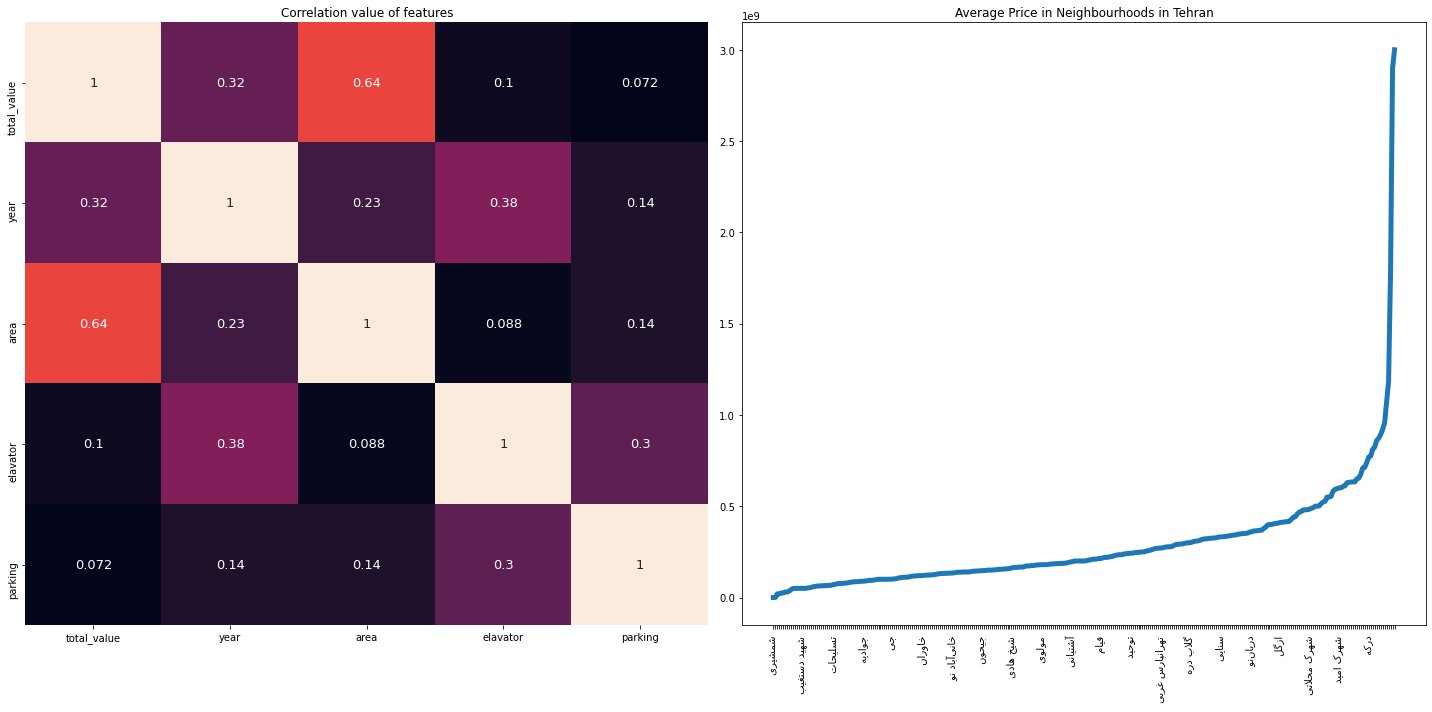

In [7]:
fig , axes = plt.subplots(1,2,figsize = (20, 10))

df_temp = df[(df['neighborhood'].str.contains('سعادت')) & (df['total_value']<5e10) & (df['total_value']!=0)]
df_temp = df_temp[['total_value','year','area','elavator','parking']]
g1 = sns.heatmap(df_temp.corr(),annot=True, annot_kws={"size": 13},cbar=False,ax=axes[0])
g1.set(title='Correlation value of features');
# plt.setp(axes[0].get_xticklabels(), rotation=90)


df_temp = df.groupby('neighborhood')[['total_value']].mean().reset_index()
df_temp = df_temp.sort_values('total_value')
g2 = sns.lineplot(data=df_temp, x = [get_display(reshape(label)) for label in df_temp['neighborhood']]
                  , y="total_value",linewidth = 5,ax=axes[1])

for ind, label in enumerate(g2.get_xticklabels()):
    if ind % 15 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
g2.set(title='Average Price in Neighbourhoods in Tehran');
g2.set(ylabel='');
# g2.set(xlabel='Neighbourhood')
plt.setp(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

To test data distribution, I use scatter plot. The main numeric feature of dataset is **area** and the goal feature is **total_value**. So plotting **area** as x vector and **total_value** as y vector, will be useful. The key point is, I should plot data for each neighbourhood separatedly.This will result in correct analysis. I picked the neighbourhood with the most number of samples for plotting and it is *سعادت آباد*.

As you can see below, there is a relation between **area** and **total_value**. As *area* increases, *total_value* increases too. So it seems that *regression* algorithms may result in good predictions.


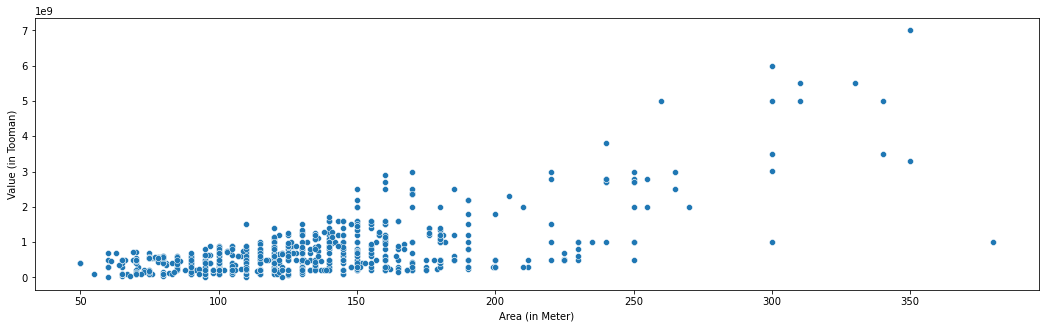

In [8]:
plt.figure(figsize= (18,5))

df_temp = df[(df['neighborhood'].str.contains('سعادت')) & (df['total_value']<5e10) & (df['total_value']!=0)]

sns.scatterplot(x = "area", y = "total_value", data = df_temp,)
plt.xlabel('Area (in Meter)');
plt.ylabel('Value (in Tooman)');
plt.show()

## Removing useless records (records with 0 value)
I found some logically bad records in the dataset. Some bad records and features were removed in preparation step before, but there are some logical bad records in the dataset yet. 

For example, I found some records with the value of 0 for *total_value*. It means that this house has the value of 0!. I guess these records have been inserted into dataset, beacuse of user faults, so  I decide to remove them all. There are **1536** records with this situation in the dataset.

In [9]:
# Houses with both rent and deposit equal 0 should be removed
df = df[(df['total_value'] > 0) ]
df.shape

(10847, 9)

## Removing useless records (records with very small sample count)
I also noticed the *neighborhoods* with less than 10 samples. These *neighborhoods* will lead into generating too many columns in dummy transformation. I convert the their *neighborhood* to other *سایر*, to make my model better and more simple.

Finally, dataset contains **10847** acceptable records.

In [10]:
# Neibourhoods with more than 10 samples are acceptable
df_temp = pd.DataFrame(df['neighborhood'].value_counts(sort = True))
df_temp = df_temp[df_temp['neighborhood'] < 10]

df.loc[(df['neighborhood'].isin(df_temp.index)), 'neighborhood'] = "سایر"
# df = df[df['neighborhood'].isin(df_head_provinces.index)]

df.reset_index(drop=True)

df.shape

(10847, 9)

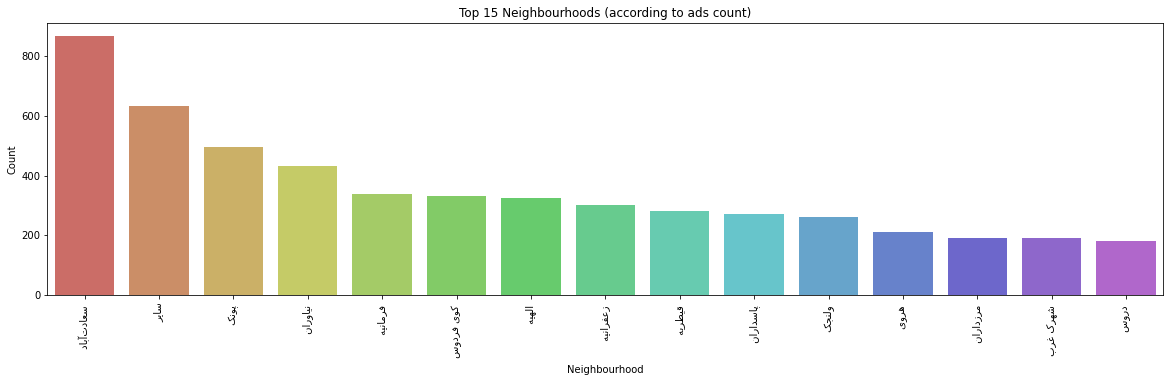

In [11]:
# Show top 15 neighbourhoods according to ads count

df_head_provinces = pd.DataFrame(df['neighborhood'].value_counts(sort = True))
df_head_provinces = df_head_provinces[df_head_provinces['neighborhood'] > 10]

df_top_15 = df_head_provinces.head(15)
plt.figure(figsize= (20, 5))
sns.barplot(data = df_top_15, x = [get_display(reshape(label)) for label in df_top_15.index]
            , y = df_top_15.values.ravel(), palette= sns.color_palette("hls", 18))
# plt.xlabel(get_display(reshape('محله ')))
# plt.ylabel(get_display(reshape('تعداد')))
# plt.title(get_display(reshape('15 محله پر آگهی')))

plt.xlabel('Neighbourhood');
plt.ylabel('Count');
plt.title('Top 15 Neighbourhoods (according to ads count)');

plt.xticks(rotation = "vertical")
plt.show()

## Removing useless records (outliers)
Some houses have very unusual *total_value* or *area*. I consider them as outliers and remove them all and show them in graph below.

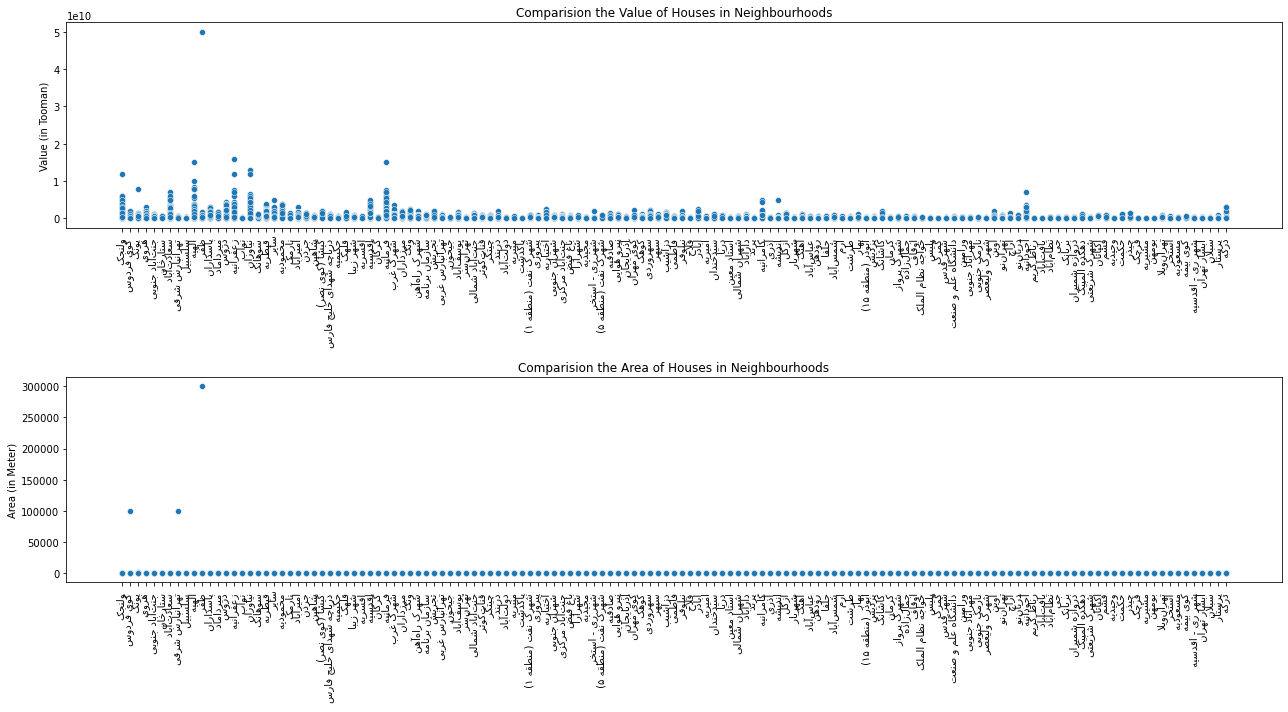

In [12]:
fig , axes = plt.subplots(2,1,figsize = (18, 10))
g1 = sns.scatterplot(x = [get_display(reshape(label)) for label in df['neighborhood']]
                     , y = "total_value", data = df, ax=axes[0])
# g1.set(title=get_display(reshape('ارزش ملک در محله ها')))
# g1.set(ylabel=get_display(reshape('ارزش ملک')))
g1.set(title='Comparision the Value of Houses in Neighbourhoods');
g1.set(ylabel='Value (in Tooman)');
g1.set(xlabel=None)
plt.setp(axes[0].get_xticklabels(), rotation=90)


g2 = sns.scatterplot(x = [get_display(reshape(label)) for label in df['neighborhood']]
                     , y = "area", data = df, ax=axes[1])
# g2.set(title=get_display(reshape('متراژ ملک در محله ها')))
# g2.set(ylabel=get_display(reshape('متراژ ملک')))
g2.set(title='Comparision the Area of Houses in Neighbourhoods');
g2.set(ylabel='Area (in Meter)');
g2.set(xlabel=None)
plt.setp(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

If you look at the data frame bellow, you will find out that houses with the *total_value* more than 40,000,000,000 are outliers (**1 record**). You may notice the houses with the amount of *area* more than 100,000 squared meter are outliers too (**3 records**).

These records seem to be unusual due to user fault. For example, there is a house with just *50* squared meter and *50,000,000,000*. This amount is almot twice the maximum of *total_amount* in dataset. Therefore, I can omit them all.

In [13]:
df_temp = df[(df['total_value'] > 30000000000) | (df['area'] >= 100000)]
df_temp.head()

,total_value,neighborhood,area,year,deposit,rent,elavator,parking,warehouse
6478,6.007500e+08,ظفر,300000,1372,6.000000e+08,25000000.0,0,1,1
7227,1.501800e+08,کوی فردوس,100000,1398,1.500000e+08,6000000.0,1,1,1
10712,2.000450e+08,تهرانپارس شرقی,100000,1395,2.000000e+08,1500000.0,1,0,1
11087,5.000014e+10,ظفر,50,1392,5.000000e+10,4500000.0,1,0,1


In [14]:
# Removing outliers
df_temp = df[df['total_value'] > 30000000000]
# print (df_temp)
print('Outliers count the field of total_value:',df_temp['neighborhood'].count())
df = df[df['total_value'] < 30000000000]

df_temp = df[df['area']  >= 100000]
print('Outliers count the field of area:',df_temp['neighborhood'].count())
# print(df_temp)
df = df[df['area'] < 100000]

print('Final valid data count:',df['neighborhood'].count())

Outliers count the field of total_value: 1
Outliers count the field of area: 3
Final valid data count: 10843


## Final valid data
At the end of data purification, dataset will consist of **10843** records. You can see distribution of data in top 15 neighbourhoods (according to sample counts), in the following graph.


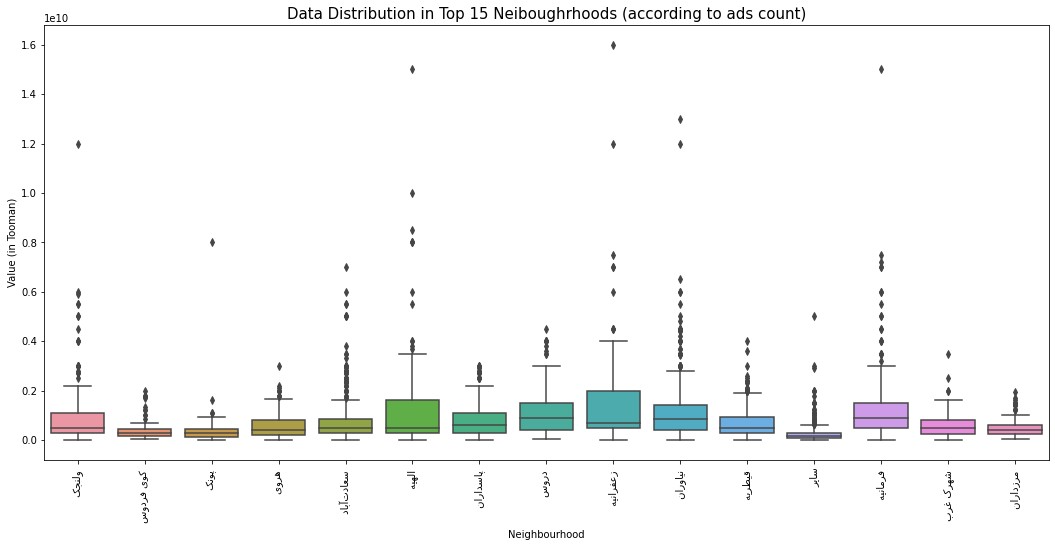

In [15]:
# Data distribution in top 15 neighbourhoods according to ads count
plt.figure(figsize= (18, 8))

df_head_provinces = pd.DataFrame(df['neighborhood'].value_counts(sort = True))
df_top_15 = df[df['neighborhood'].isin(df_head_provinces.head(15).index)]

sns.boxplot(x = [get_display(reshape(label)) for label in df_top_15['neighborhood']] 
            , y = "total_value", data = df_top_15)
# plt.title(get_display(reshape('توزیع داده در 15 محله پر آگهی')),fontsize="15")
plt.title('Data Distribution in Top 15 Neiboughrhoods (according to ads count)',fontsize="15")
plt.xlabel('Neighbourhood');
plt.ylabel('Value (in Tooman)');
plt.xticks(rotation = "vertical")
plt.show()

## Model Evaluation, Tuning and Prediction

In [16]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

!pip install xgboost
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor

## Generate Input Array and Output  Vector
In order to build my model, I need to get dummies of *neighborhood* and change the type of data set to numpy array.

The input array will have 5276 records and 96 features and the output vector will have 5276 elements at the end.

In [17]:
df_main = pd.get_dummies(df, columns=["neighborhood"])

df_main.drop(columns=['rent','deposit'], inplace=True, axis=1)

temp_data = df_main.to_numpy()
X = temp_data[:,1:]
y = temp_data[:,0]

## Comparing Different Algorithms of Regression
At first, I prepare train and test sets for inputs and outputs. I use cross validation to ensure that the score and error values are more accurate.

I compare different algorithms of regression to pick the best one as my model. For this purpose, I declare some lists and fuctions to calculate and show the performance of each regression algorithm.

In [18]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [19]:
Model = []
RMSE = []
MAE = []
MSE = []
R_Square = []
adj_rsquared = []
CV = []
Score = []

names = ["ExtraTrees Regressor", "Gradient Boosting Regressor", "Random Forest Regressor",  
         "Bagging Regressor","XGB Regressor","Linear Regression", "Ridge Regression", 
         "Lasso Regression", "Decision Tree Regressor", "XGBRF Regressor", "Adaboost Regressor"]
models = [ExtraTreesRegressor(), GradientBoostingRegressor(), RandomForestRegressor(),  
          BaggingRegressor(), XGBRegressor(), LinearRegression(), Ridge(), 
          Lasso(), DecisionTreeRegressor(), XGBRFRegressor(), AdaBoostRegressor()]

names_to_plot = ["XGBRF Regressor", "Random Forest Regressor"]
models_to_plot = [XGBRFRegressor(),  RandomForestRegressor()]


In [20]:
def evaluate(true, predicted, variable_of_model):
    MAE.append(metrics.mean_absolute_error(true, predicted))
    MSE.append(metrics.mean_squared_error(true, predicted))
    RMSE.append(np.sqrt(metrics.mean_squared_error(true, predicted)))
    R_Square.append(metrics.r2_score(true, predicted))
    n= X_test.shape[0]
    p= X_test.shape[1] - 1
    adj_rsquared.append(1 - (1 - R_Square[-1]) * ((n - 1)/(n-p-1)))
    cv_accuracies = cross_val_score(estimator = variable_of_model, X = X_train, y = y_train.ravel(), cv = 5,verbose = 1)
    CV.append(cv_accuracies.mean())
    Score.append(variable_of_model.score(X_test, y_test.ravel()))

def pred_vis(name, y_test_vis, y_pred_vis):
    if y_test_vis.shape[0] > 300:
        y_test_vis = y_test_vis[:300]
        y_pred_vis = y_pred_vis[:300]
        
    y_test_m_vis = y_test_vis
    plt.figure(figsize=(18,5))
    plt.title("{} Prediction" .format(name))
    plt.plot(y_test_m_vis, c="steelblue", alpha=1)
    plt.plot(y_pred_vis, c="darkorange", alpha=.7,linestyle='dashed')
    legend_list = ["y_test", "y_pred"]
#     plt.xlabel("Var")
    plt.ylabel("Output")
    plt.legend(legend_list, loc=1,fontsize="10")
    plt.grid(True)
    plt.show()

def fit_and_predict(name, model):
    variable_of_model = model
    variable_of_model.fit(X_train, y_train.ravel())
    pred = variable_of_model.predict(X_test)
    evaluate(y_test, pred, variable_of_model)
    if name in names_to_plot :
        pred_vis(name, y_test, pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   44.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.9s finished


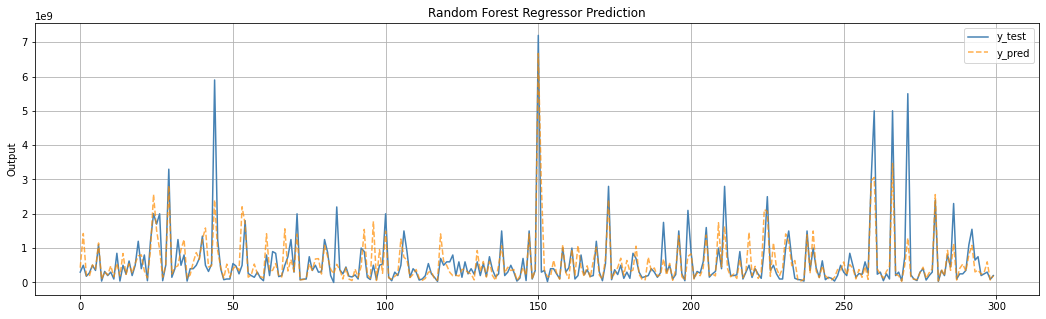

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\a.alimadadi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3870013975092422e+20, tolerance: 4.996011391475374e+17
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\

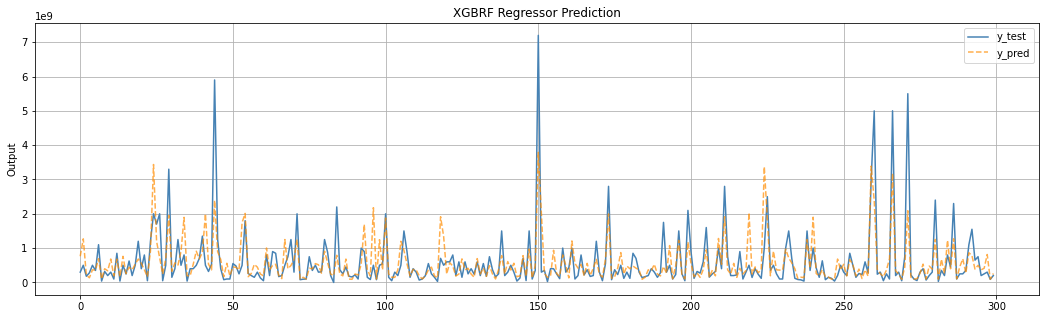

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


In [21]:

for name, model in zip(names, models):
    fit_and_predict(name, model)

## Result
After applying fit and predict to all regression algorithms, I can get a good result of each algorithm.

Since, it is a regression task, I should pay attention to the *Score* and error values like *MSE* simultaneously. 

In [22]:
evaluation_dataframe = pd.DataFrame({"Model": names,
                                     "MAE": MAE,
                                     "MSE": MSE,
                                     "RMSE": RMSE,
                                     "R Squared": R_Square,
                                     "adj R Squared": adj_rsquared,
                                     "Cross Validation": CV,
                                     "Score" : Score})

In [23]:
evaluation_dataframe.sort_values("MSE")

,Model,MAE,MSE,RMSE,R Squared,adj R Squared,Cross Validation,Score
9,XGBRF Regressor,3.048658e+08,2.842075e+17,5.331112e+08,0.582209,0.558936,4.432716e-01,0.582209
2,Random Forest Regressor,2.798584e+08,2.869897e+17,5.357142e+08,0.578120,0.554618,4.198881e-01,0.578120
1,Gradient Boosting Regressor,3.011962e+08,2.944178e+17,5.426028e+08,0.567200,0.543090,4.519228e-01,0.567200
4,XGB Regressor,2.847852e+08,2.966996e+17,5.447014e+08,0.563846,0.539549,4.162594e-01,0.563846
3,Bagging Regressor,2.832235e+08,2.981281e+17,5.460111e+08,0.561746,0.537332,3.917641e-01,0.561746
0,ExtraTrees Regressor,2.833341e+08,3.135726e+17,5.599756e+08,0.539042,0.513364,3.622101e-01,0.539042
6,Ridge Regression,3.334305e+08,3.372537e+17,5.807355e+08,0.504231,0.476613,4.614462e-01,0.504231
7,Lasso Regression,3.336403e+08,3.374512e+17,5.809055e+08,0.503940,0.476306,4.610624e-01,0.503940
5,Linear Regression,3.336396e+08,3.374514e+17,5.809057e+08,0.503940,0.476306,-3.023104e+16,0.503940
10,Adaboost Regressor,3.459914e+08,3.664845e+17,6.053796e+08,0.461261,0.431249,3.288421e-01,0.461261


## Model Selection
As you can see, there are several regression algorithms return acceptable results. Based on *MSE* and *Score* values, ***XGBRFRegressor***, ***Gradient Boosting Regressor*** and ***Random Forest Regressor*** are good models.


### Tips
1.   Almost, all types of regression return acceptable good results.
2.   The performance of each regression type depends on dataset size. For example, if you decrease the size of dataset to half or less, some types of regression like **Linear** or **Laso** retrun better results.
3.   By removing the neighbourhood *سایر*, different results may be generated.
4.   Most of the regression algorithms worked well in this task.

## Polynomial Regression
Since polynomial regression is not a redefined regression structure, I have to implement and analyze it separetely. I make a pipline with polynomial features and linear regression to build a polynomial regression structure. 

By plotting the **validation_curve** and also **GridSearchCV**, it is obvious that the **1th degree polynomial** is the optimal point. This means that polynomial regression works as well as linear regression. 

Therefore, I decide to test polynomial on just one neighbourhood, because it seems that polynomial may work better in a neighbourhood.

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

df_polynomial = df
temp_data = df_polynomial.to_numpy()

X = temp_data[:,2].reshape(-1, 1)
y = temp_data[:,0]

C:\Users\a.alimadadi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=range(0, 15) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


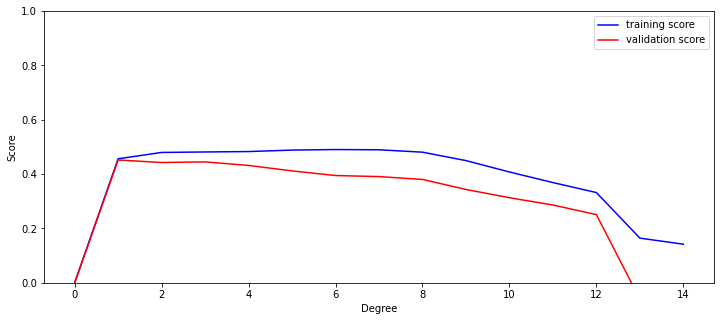

In [25]:
from sklearn.model_selection import validation_curve

plt.figure(figsize= (12,5))

degree = range(15)

train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=5)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Degree')
plt.ylabel('Score');



In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(15),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=5)
grid.fit(X, y);
grid.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 1}

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

model = PolynomialRegression(1)
model.fit(X, y)
y_model = model.predict(X_test)
print('Best Score:', model.score(X_test, y_test.ravel()))
print('Best MSE:', metrics.mean_squared_error(y_test, y_model))

Best Score: 0.48287548669183855
Best MSE: 3.517808005463271e+17


## Applying polynomial on one neighbourhood
As I said before, it seems that polynomial regression may work better in 1 neighbourhood. I select **سعادت آباد** as the input array due to its sample counts.

By plotting the **validation_curve** and also **GridSearchCV**, it is obvious that the **5th degree polynomial** is the optimal point. The *MSE* value has been reduced comparing to the result of all applying polynomial regression to all neighbourhoods. So it seems that polynomial regression may be a good choice for analysing neighbourhoods separately.

In [28]:
df_polynomial =  df[df['neighborhood'].str.contains('سعادت')]
temp_data = df_polynomial.to_numpy()

X = temp_data[:,2].reshape(-1, 1)
y = temp_data[:,0]

C:\Users\a.alimadadi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=range(0, 15) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


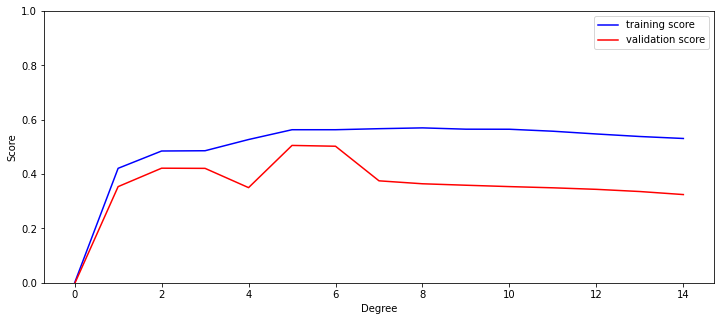

In [29]:
plt.figure(figsize= (12,5))

degree = range(15)

train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=5)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Degree')
plt.ylabel('Score');

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(15),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=5)
grid.fit(X, y);
grid.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 5}

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

model = PolynomialRegression(5)
model.fit(X, y)
y_model = model.predict(X_test)
print('Best Score:', model.score(X_test, y_test.ravel()))
print('Best MSE:', metrics.mean_squared_error(y_test, y_model))

Best Score: 0.4477996427286959
Best MSE: 2.89098581759137e+17


## Conculusions
In a nutshell, there are some tips that I am going to point here.
1.  It seems that input data features are enough for getting good results.
2.  It is obvious that almost all regression algorithms are good solutions for this study.
3.  Polynomial regression works well on each neighbourhood, but it fails on the whole neighbourhoods data.
4.  I guess Neural networks can generate good results in this case and they can be good model for further research in the field of housing price.
